# Flowers
Computer Vision (CV) Challenge: Use a pre-trained ResNet 50 and train on the Flowers dataset.

## Downlaod Data

In [ ]:
# Download flowers images
!curl https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz --output ../data/102flowers.tgz

# Download flowers segmentation
!curl https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz --output ../data/102segmentations.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  328M  100  328M    0     0  12.2M      0  0:00:26  0:00:26 --:--:-- 14.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  194M  100  194M    0     0  12.4M      0  0:00:15  0:00:15 --:--:-- 14.3M


In [ ]:
# Download labels
!curl https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat --output ../data/imagelabels.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   502  100   502    0     0    215      0  0:00:02  0:00:02 --:--:--   215


In [ ]:
# Download splits
!curl https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat --output ../data/splits.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14989  100 14989    0     0  14609      0  0:00:01  0:00:01 --:--:-- 14609


## Extract data

In [ ]:
# extract flowers data
!tar -xf ../data/102flowers.tgz -C ../data/

In [ ]:
# extract segmented flowers
!tar -xf ../data/102segmentations.tgz -C ../data/

## Setup dataset directories and splits

In [ ]:
# load images
import os

images = os.listdir('../data/jpg')
segmented_images = os.listdir('../data/segmim')

print("Images length: ", len(images))
print("Segmented images length: ", len(segmented_images))

Images length:  8189
Segmented images length:  8189


In [ ]:
print(f"images: {images[:5]}...")
print(f"segmented images: {segmented_images[:5]}...")

images: ['image_06859.jpg', 'image_01513.jpg', 'image_06800.jpg', 'image_07514.jpg', 'image_08171.jpg']...
segmented images: ['segmim_05977.jpg', 'segmim_01304.jpg', 'segmim_04284.jpg', 'segmim_07657.jpg', 'segmim_07696.jpg']...


the images isn't sorted so should sort them to be the same order as the labels

In [ ]:
# sort images
images.sort()
segmented_images.sort()

print(f"images: {images[:5]}...")
print(f"segmented images: {segmented_images[:5]}...")

images: ['image_00001.jpg', 'image_00002.jpg', 'image_00003.jpg', 'image_00004.jpg', 'image_00005.jpg']...
segmented images: ['segmim_00001.jpg', 'segmim_00002.jpg', 'segmim_00003.jpg', 'segmim_00004.jpg', 'segmim_00005.jpg']...


In [ ]:
!pip install mat4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load labels and splits
from mat4py import loadmat

labels = loadmat('../data/imagelabels.mat')
splits = loadmat('../data/splits.mat')

print("type of labels: ", type(labels))
print("type of splits: ", type(splits))

type of labels:  <class 'dict'>
type of splits:  <class 'dict'>


In [ ]:
print("labels keys:", labels.keys())
print("splits keys:", splits.keys())

labels keys: dict_keys(['labels'])
splits keys: dict_keys(['trnid', 'valid', 'tstid'])


In [ ]:
# get labels list
labels = labels['labels']

print("Labels length:", len(labels))

Labels length: 8189


In [ ]:
print('Training   length:', len(splits['trnid']))
print('Testing    length:', len(splits['tstid']))
print('validation length:', len(splits['valid']))

Training   length: 1020
Testing    length: 6149
validation length: 1020


It seems that the training split and testing split are swapped so I will handle that in the next step while splitting

In [ ]:
# Setup images dataset directories
datasets = ['../data/Training', '../data/Testing', '../data/Validation']

for dataset in datasets:
    os.mkdir(dataset)
    for i in range(1, 103):
        os.mkdir(dataset + f'/{i}')

In [ ]:
# split images to directories
import shutil

print("Start splitting....")

print("Copying testing data.....")
for img_id in splits['trnid']:
    img = images[img_id - 1]
    source = "../data/jpg/" + img
    destination = f"../data/Testing/{labels[img_id-1]}/{img}"
    shutil.copy(source, destination)

print("Copying validation data.....")
for img_id in splits['valid']:
    img = images[img_id - 1]
    source = "../data/jpg/" + img
    destination = f"../data/Validation/{labels[img_id-1]}/{img}"
    shutil.copy(source, destination)

print("Copying training data.....")
for img_id in splits['tstid']:
    img = images[img_id - 1]
    source = "../data/jpg/" + img
    destination = f"../data/Training/{labels[img_id-1]}/{img}"
    shutil.copy(source, destination)

print("Splitting finished")

Start splitting....
Copying testing data.....
Copying validation data.....
Copying training data.....
Splitting finished


In [ ]:
# Setup segmented images dataset directories
datasets = ['../data/SegmentedTraining', '../data/SegmentedTesting', '../data/SegmentedValidation']

for dataset in datasets:
    os.mkdir(dataset)
    for i in range(1, 103):
        os.mkdir(dataset + f'/{i}')

In [ ]:
import shutil

print("Start splitting....")

print("Copying testing data.....")
for img_id in splits['trnid']:
    img = segmented_images[img_id - 1]
    source = "../data/segmim/" + img
    destination = f"../data/SegmentedTesting/{labels[img_id-1]}/{img}"
    shutil.copy(source, destination)

print("Copying validation data.....")
for img_id in splits['valid']:
    img = segmented_images[img_id - 1]
    source = "../data/segmim/" + img
    destination = f"../data/SegmentedValidation/{labels[img_id-1]}/{img}"
    shutil.copy(source, destination)

print("Copying training data.....")
for img_id in splits['tstid']:
    img = segmented_images[img_id - 1]
    source = "../data/segmim/" + img
    destination = f"../data/SegmentedTraining/{labels[img_id-1]}/{img}"
    shutil.copy(source, destination)

print("Splitting finished")

Start splitting....
Copying testing data.....
Copying validation data.....
Copying training data.....
Splitting finished


Now the data is ready

## Importing packages

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

## Visualize some images

Image shape: (655, 500, 3)
Image Label: 30


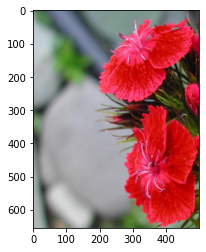

Image shape: (500, 661, 3)
Image Label: 41


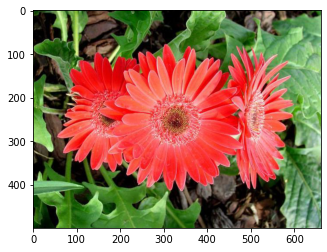

Image shape: (500, 581, 3)
Image Label: 96


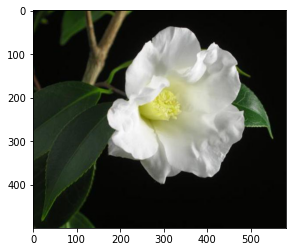

Image shape: (500, 667, 3)
Image Label: 18


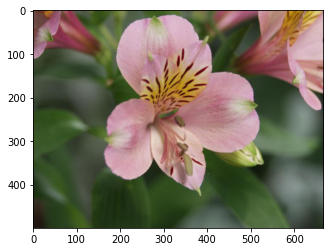

Image shape: (500, 500, 3)
Image Label: 50


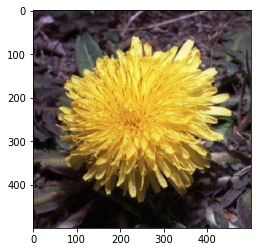

Image shape: (507, 500, 3)
Image Label: 45


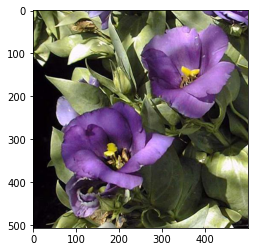

Image shape: (501, 548, 3)
Image Label: 98


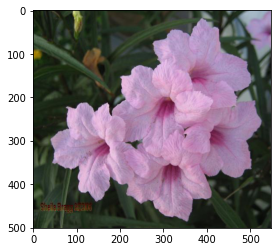

Image shape: (500, 751, 3)
Image Label: 8


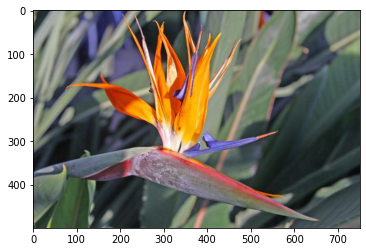

Image shape: (644, 500, 3)
Image Label: 51


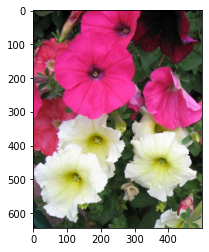

Image shape: (500, 766, 3)
Image Label: 26


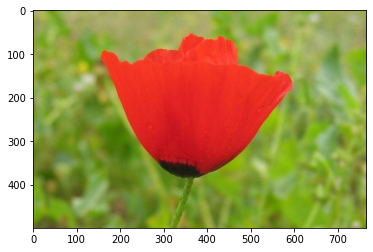

In [ ]:
for i in range(10):
    idx = np.random.randint(low=0, high=8000)
    img = plt.imread("../data/jpg/" + images[idx])
    print("Image shape:", img.shape)
    print("Image Label:", labels[idx+1])
    plt.imshow(img)
    plt.show()

Images have different shapes so we should resize them

## Create data generators

In [ ]:
# Training ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    '../data/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

Found 6149 images belonging to 102 classes.


In [ ]:
# Validation ImageDataGenerator
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    '../data/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
)

Found 1020 images belonging to 102 classes.


In [ ]:
# Testing ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../data/Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
)

Found 1020 images belonging to 102 classes.


In [ ]:
import os, sys
sys.path.append(os.path.realpath('..'))

from src.model import define_compile_model, draw_loss, draw_accuracy

## ResNet50

In [ ]:
EPOCHS     = 3
ENCODERS   = ['resnet']
DROPOUTS   = [0, 0.2]
OPTIMIZERS = ['Adam', 'SGD']
UNITS      = [128, 512, 1028]
FREEZE     = [True, False]

i = 1
for encoder in ENCODERS:
    print("======================================================================================")
    print(f"Using {encoder} encoder.")
    for freeze in FREEZE:
        for optimizer in OPTIMIZERS:
            for unit in UNITS:
                for dropout in DROPOUTS:
                    print("--------------------------------------------------------------------------------------")
                    print(f"Start experiment num: {i} with hyperparameters \n"
                          f"optimizer: {optimizer}, units: {unit}, dropout rate: {dropout}, freeze: {freeze}")
                    i += 1
                    model = define_compile_model(
                        encoder=encoder,
                        units=unit,
                        optimizer=optimizer,
                        dropout_rate=dropout,
                        freeze=freeze
                    )
                    model.fit(
                        train_generator,
                        validation_data=valid_generator,
                        epochs=EPOCHS
                    )

Using resnet encoder.
--------------------------------------------------------------------------------------
Start experiment num: 1 with hyperparameters 
optimizer: Adam, units: 128, dropout rate: 0, freeze: True
94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/3
193/193 [==============================] - 110s 514ms/step - loss: 4.4479 - accuracy: 0.0457 - val_loss: 4.7405 - val_accuracy: 0.0108
Epoch 2/3
193/193 [==============================] - 99s 514ms/step - loss: 4.3287 - accuracy: 0.0537 - val_loss: 4.7234 - val_accuracy: 0.0167
Epoch 3/3
193/193 [==============================] - 97s 502ms/step - loss: 4.2587 - accuracy: 0.0651 - val_loss: 4.6178 - val_accuracy: 0.0245
--------------------------------------------------------------------------------------
Start experiment num: 2 with hyperparameters 
optimizer: Adam, units: 128, dropout rate: 0.2, freeze: True
Epoch 1/3
193/193 [==============================] - 102s 514ms/step - loss: 4.4857 - accuracy

It seems that ResNet50 works well with SGD Optimizer, 1028 units without freezing the encoder layers but should increase the dropout rate a little bit

In [ ]:
# Detect no improving and save best model weights
import tensorflow as tf
detect_no_improving = tf.keras.callbacks.EarlyStopping(patience=5,
                                                       monitor='val_loss',
                                                       restore_best_weights=True,
                                                       verbose=1)

In [ ]:
epochs  = 15
encoder = 'resnet'
dropout = 0.4
optimizer = 'SGD'
units  = 1028
freeze = False

print("--------------------------------------------------------------------------------------")
print(f"Start fine tune the model with best hyperparameters \n"
      f"optimizer: {optimizer}, units: {units}, dropout rate: {dropout}, freeze: {freeze}")

model = define_compile_model(
    encoder=encoder,
    units=units,
    optimizer=optimizer,
    dropout_rate=dropout,
    freeze=freeze
)
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    callbacks=[detect_no_improving]
)

--------------------------------------------------------------------------------------
Start fine tune the model with best hyperparameters 
optimizer: SGD, units: 1028, dropout rate: 0.4, freeze: False
Epoch 1/15
193/193 [==============================] - 118s 587ms/step - loss: 2.7126 - accuracy: 0.4284 - val_loss: 6.1299 - val_accuracy: 0.0069
Epoch 2/15
193/193 [==============================] - 111s 572ms/step - loss: 0.8601 - accuracy: 0.8037 - val_loss: 4.8491 - val_accuracy: 0.0137
Epoch 3/15
193/193 [==============================] - 112s 580ms/step - loss: 0.3975 - accuracy: 0.9034 - val_loss: 3.7703 - val_accuracy: 0.1667
Epoch 4/15
193/193 [==============================] - 112s 577ms/step - loss: 0.2434 - accuracy: 0.9413 - val_loss: 1.4639 - val_accuracy: 0.6441
Epoch 5/15
193/193 [==============================] - 112s 578ms/step - loss: 0.1667 - accuracy: 0.9590 - val_loss: 0.3547 - val_accuracy: 0.9069
Epoch 6/15
193/193 [==============================] - 110s 569ms/ste

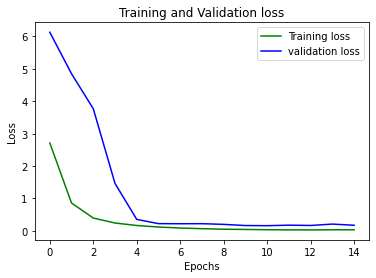

In [ ]:
draw_loss(history)

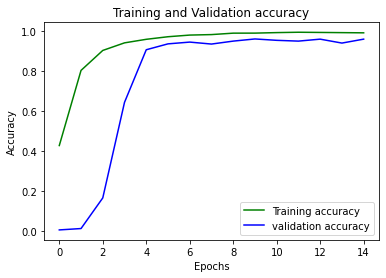

In [ ]:
draw_accuracy(history)

In [ ]:
# y_test
y_test = test_generator.classes

#Predict
y_prediction = model.predict(test_generator)
y_prediction = np.argmax (y_prediction, axis = 1)

print(classification_report(y_test, y_prediction))

32/32 [==============================] - 8s 239ms/step
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       1.00      1.00      1.00        10
           5       0.82      0.90      0.86        10
           6       1.00      1.00      1.00        10
           7       1.00      0.80      0.89        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       0.91      1.00      0.95        10
          11       0.91      1.00      0.95        10
          12       0.82      0.90      0.86        10
          13       0.77      1.00      0.87        10
          14       1.00      1.00      1.00        10
          15       0.90      0.90      0.90        10
          16       1.00   

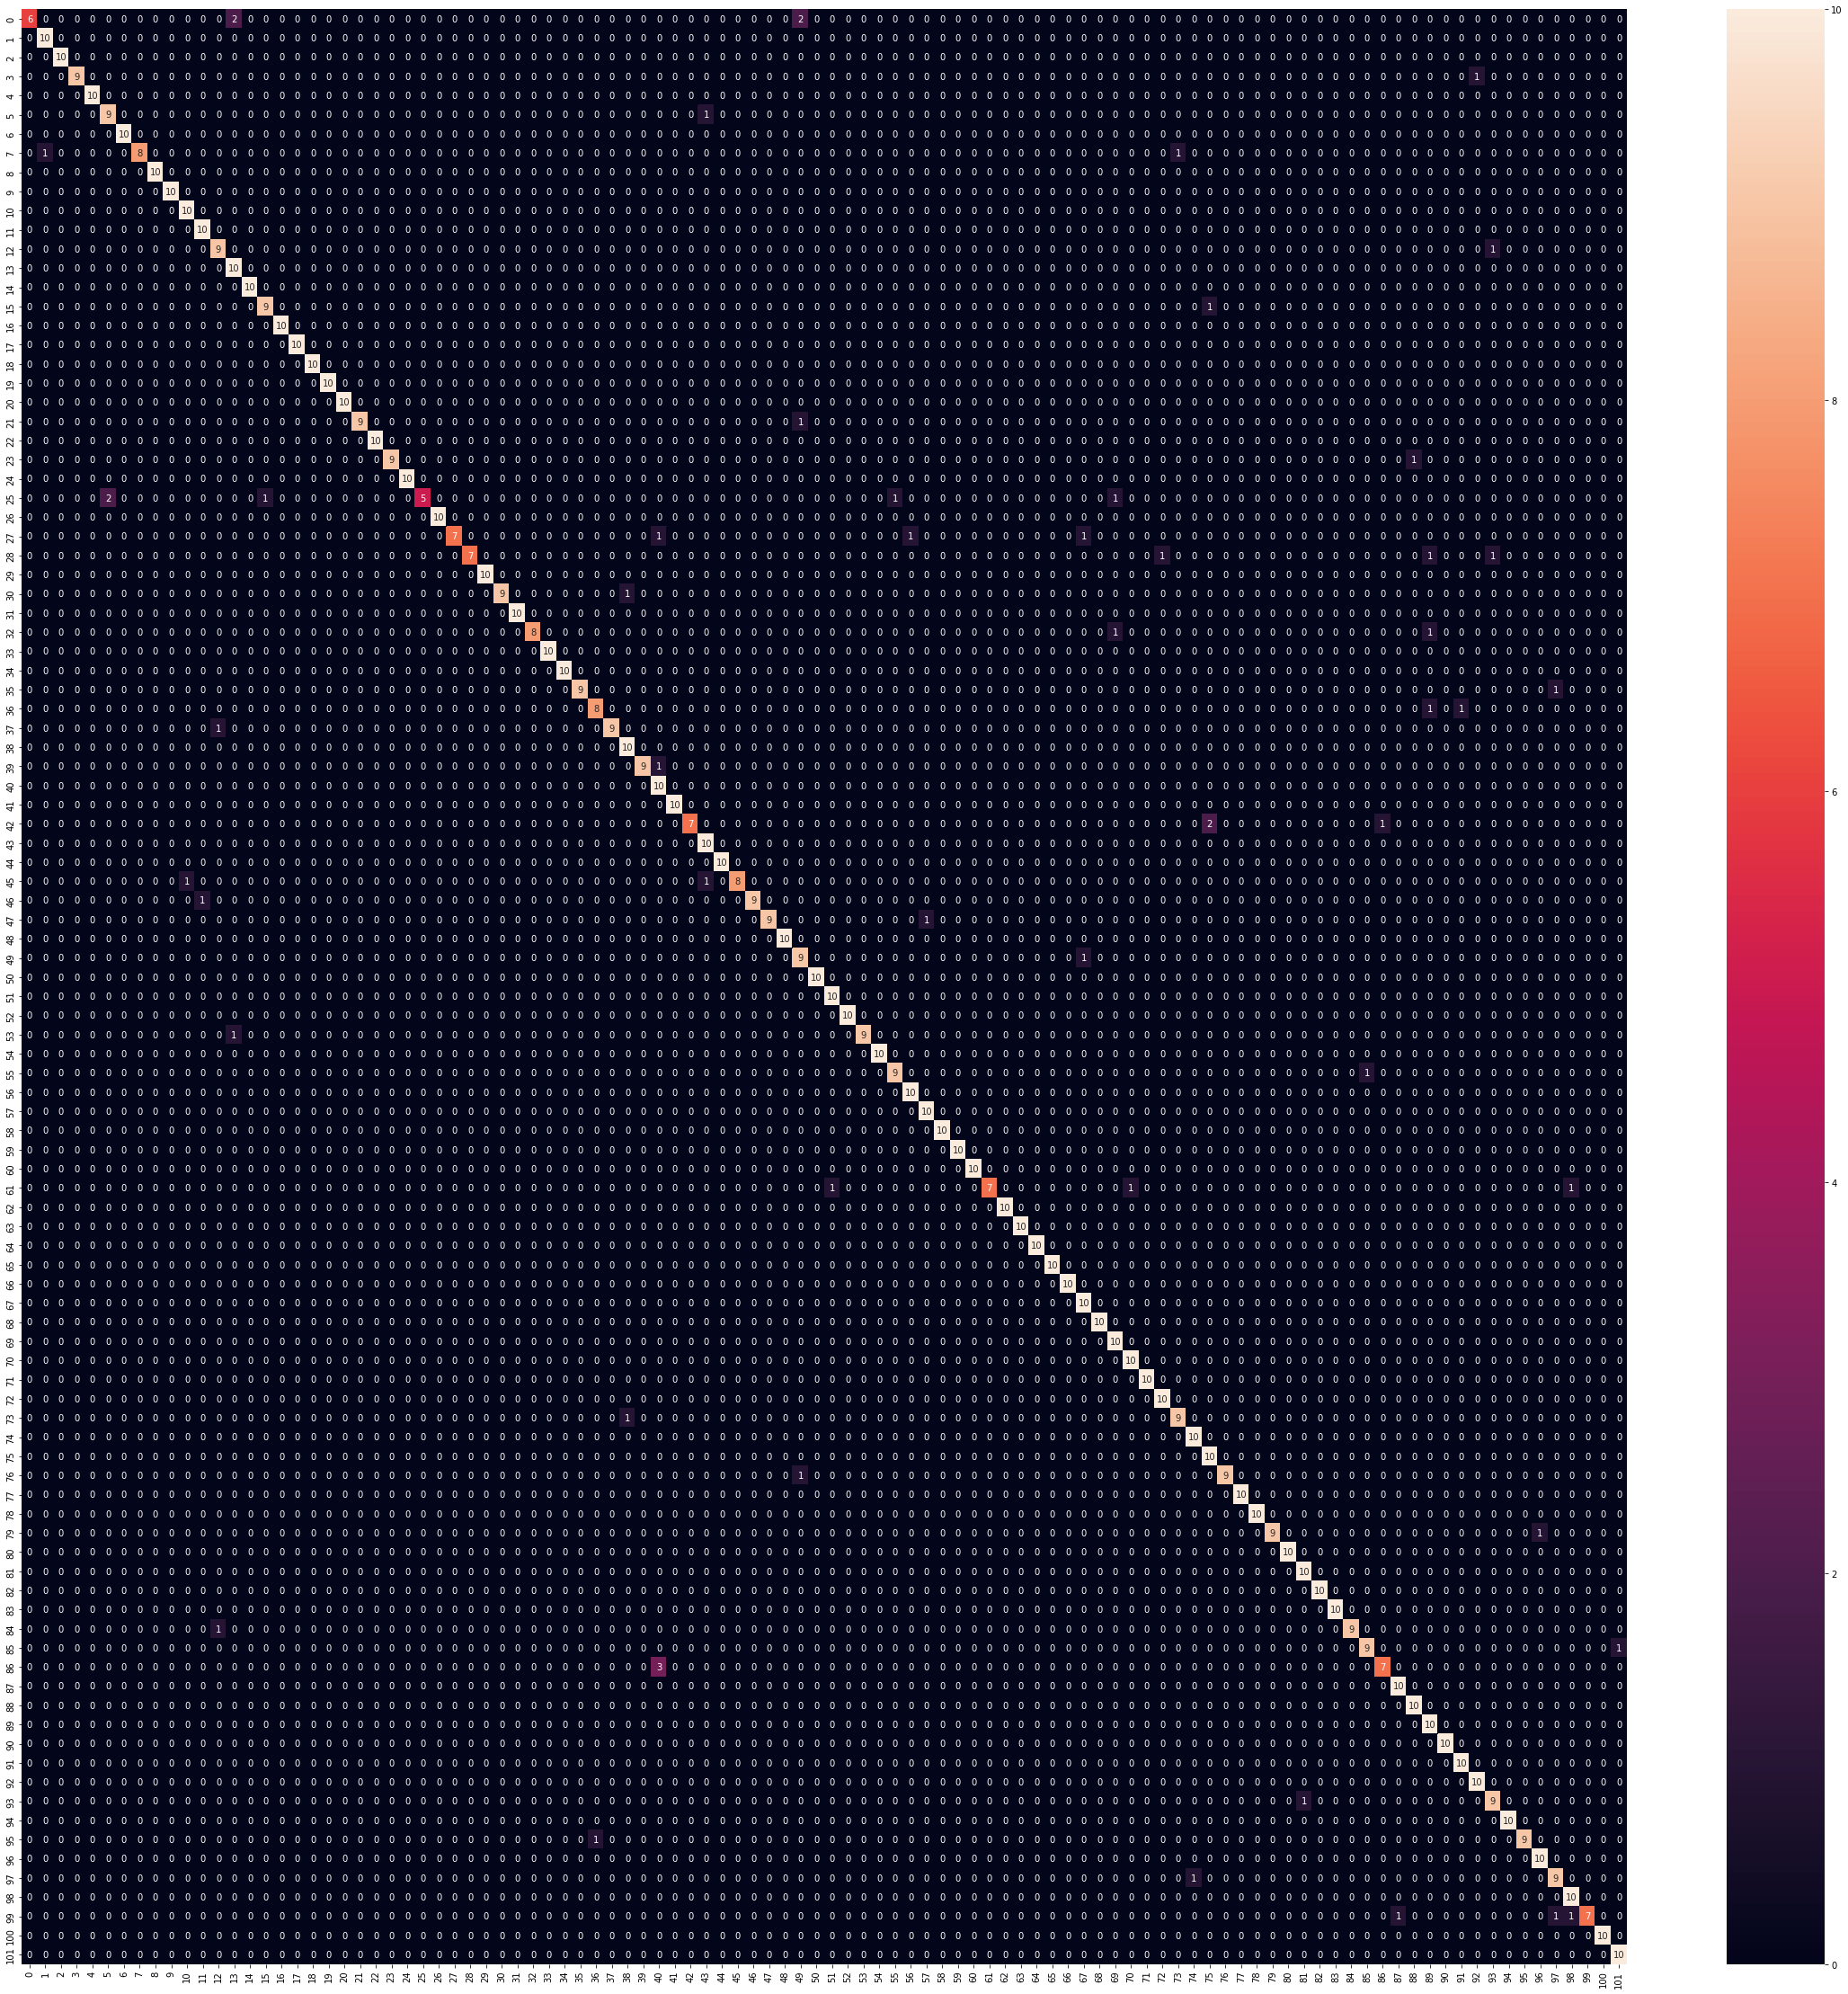

In [ ]:
cm = confusion_matrix(y_test, y_prediction)
fig = plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# save model
model.save("../models/ResNet50")

## Training using Segmented data

In [ ]:
# Training ImageDataGenerator
train_datagen_seg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator_seg = train_datagen_seg.flow_from_directory(
    '../data/SegmentedTraining',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

# Validation ImageDataGenerator
valid_datagen_seg = ImageDataGenerator(rescale=1./255)

valid_generator_seg = valid_datagen_seg.flow_from_directory(
    '../data/SegmentedValidation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
)

# Testing ImageDataGenerator
test_datagen_seg = ImageDataGenerator(rescale=1./255)

test_generator_seg = test_datagen_seg.flow_from_directory(
    '../data/SegmentedTesting',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
)

Found 6149 images belonging to 102 classes.
Found 1020 images belonging to 102 classes.
Found 1020 images belonging to 102 classes.


In [37]:
epochs  = 15
encoder = 'resnet'
dropout = 0.4
optimizer = 'SGD'
units  = 1028
freeze = False

print("--------------------------------------------------------------------------------------")
print(f"Start fine tune the model with best hyperparameters \n"
      f"optimizer: {optimizer}, units: {units}, dropout rate: {dropout}, freeze: {freeze}")

model_seg = define_compile_model(
    encoder=encoder,
    units=units,
    optimizer=optimizer,
    dropout_rate=dropout,
    freeze=freeze
)
history_seg = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    callbacks=[detect_no_improving]
)

--------------------------------------------------------------------------------------
Start fine tune the model with best hyperparameters 
optimizer: SGD, units: 1028, dropout rate: 0.4, freeze: False
Epoch 1/15
193/193 [==============================] - 120s 597ms/step - loss: 2.7525 - accuracy: 0.4188 - val_loss: 6.0512 - val_accuracy: 0.0098
Epoch 2/15
193/193 [==============================] - 112s 580ms/step - loss: 0.8470 - accuracy: 0.8016 - val_loss: 5.2291 - val_accuracy: 0.0059
Epoch 3/15
193/193 [==============================] - 112s 579ms/step - loss: 0.4002 - accuracy: 0.9003 - val_loss: 4.0669 - val_accuracy: 0.1059
Epoch 4/15
193/193 [==============================] - 110s 571ms/step - loss: 0.2259 - accuracy: 0.9481 - val_loss: 1.3137 - val_accuracy: 0.6578
Epoch 5/15
193/193 [==============================] - 112s 578ms/step - loss: 0.1584 - accuracy: 0.9606 - val_loss: 0.3709 - val_accuracy: 0.9029
Epoch 6/15
193/193 [==============================] - 111s 575ms/ste

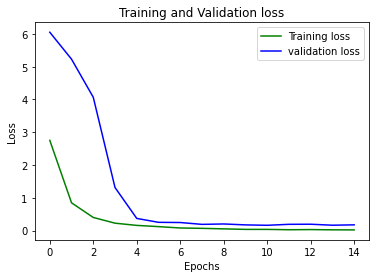

In [38]:
draw_loss(history_seg)

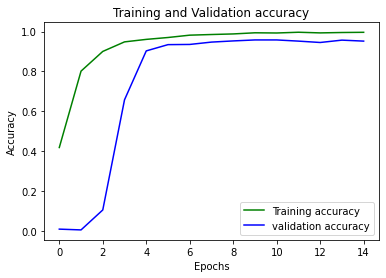

In [39]:
draw_accuracy(history_seg)

In [41]:
# y_test
y_test_seg = test_generator.classes

#Predict
y_prediction_seg = model.predict(test_generator_seg)
y_prediction_seg = np.argmax (y_prediction_seg, axis = 1)

print(classification_report(y_test_seg, y_prediction_seg))

32/32 [==============================] - 10s 314ms/step
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.90      0.90      0.90        10
           2       0.91      1.00      0.95        10
           3       0.89      0.80      0.84        10
           4       0.90      0.90      0.90        10
           5       0.70      0.70      0.70        10
           6       0.77      1.00      0.87        10
           7       1.00      0.70      0.82        10
           8       1.00      0.50      0.67        10
           9       1.00      0.90      0.95        10
          10       0.75      0.60      0.67        10
          11       0.90      0.90      0.90        10
          12       0.90      0.90      0.90        10
          13       1.00      0.70      0.82        10
          14       1.00      1.00      1.00        10
          15       0.56      0.90      0.69        10
          16       1.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


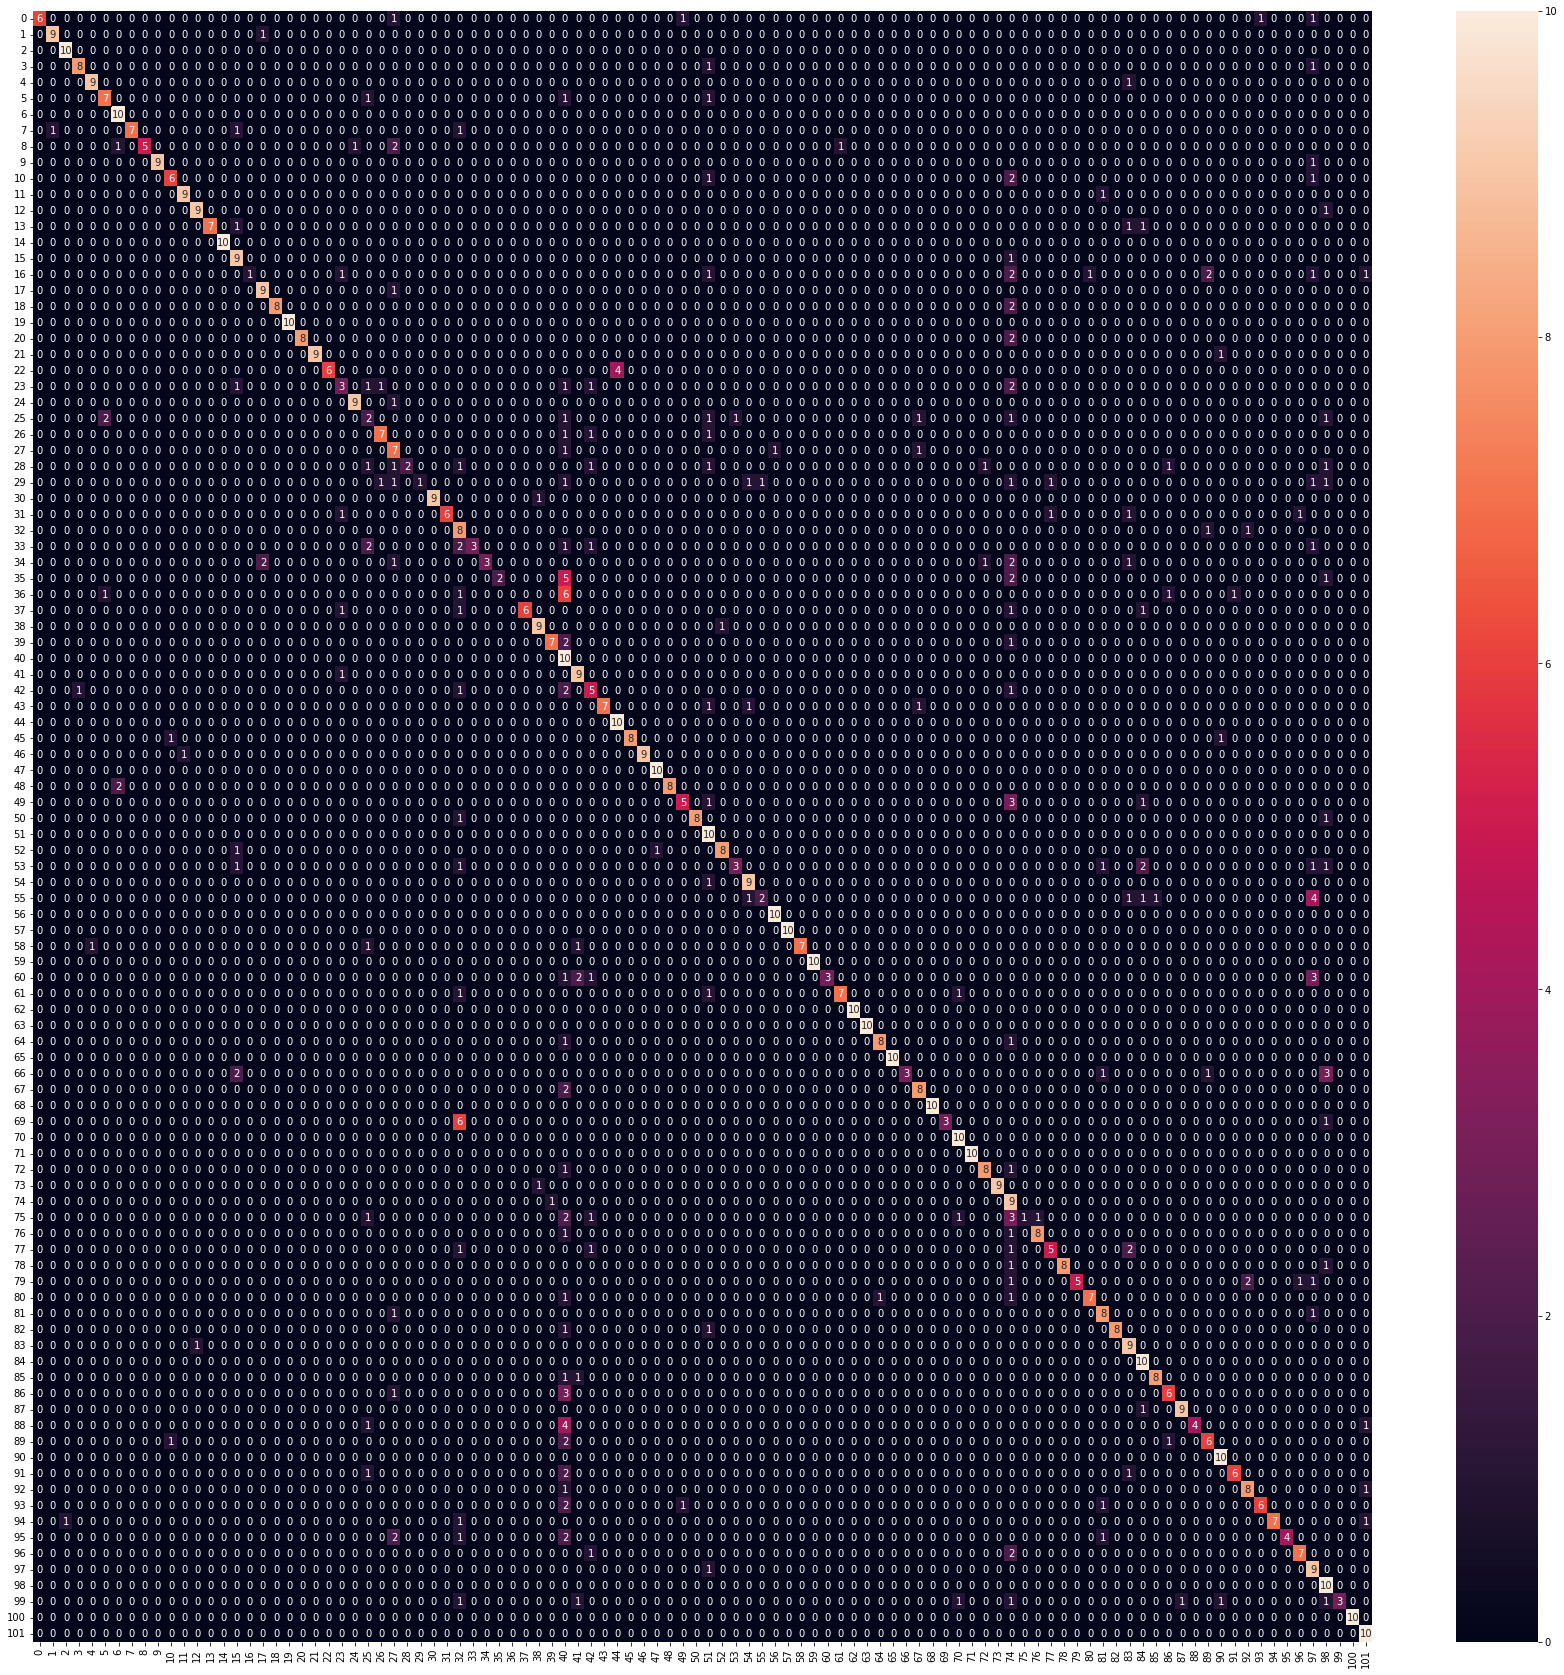

In [42]:
cm = confusion_matrix(y_test_seg, y_prediction_seg)
fig = plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True)
plt.show()

In [43]:
# save model
model.save("../models/ResNet50_seg")

## Conclusion

- The model achieved good results
- There are some classes didn't generalize well with test set as classes 23, 25, 28, 29, 75, 99
- the class 36 classified incorrectly
- I think we should check these data manually and search for mislabeled images or the class may need more training images
- We should also try other feature extractor as InceptionV3, VGG19, VGG16 or mobilenet